In [11]:
#import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import import_ipynb


In [12]:
%%capture
import Dataframes as df

In [13]:
df.framedict.keys()

dict_keys(['Deaths', 'Vaccination', 'Demographics', 'Age', 'Hospitals'])

In [14]:
#As always we have to specify to jupyter that we want to see all the outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 20000


In [15]:

# #the %%capture makes sure not the whole of last assignment is printed here

# #This imports dataframes from other code.
# %run "Dataframes.ipynb"

In [22]:
df.hosp_frame.head()


,pc11_state_id,censuscode,dlhs4_dh_beds,dlhs4_dh_count,dlhs4_dh_staff,dlhs4_dh_icu_beds,dlhs4_chc_beds,dlhs4_chc_count,dlhs4_chc_staff,dlhs4_chc_beds_ven,dlhs4_phc_beds,dlhs4_phc_count,dlhs4_phc_staff,dlhs4_phc_pop,dlhs4_phc_beds_oxy,pc11_pca_tot_p,dlhs4_phc_mult,dlhs4_total_beds,dlhs4_total_staff,dlhs4_total_facilities
1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
india_shp_MASTERS = './maps-master/maps-master/Districts/Census_2011/2011_Dist.shp'

In [24]:
india_s_masters = gpd.read_file(india_shp_MASTERS)
india_s_masters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB


In [25]:
india_s_masters.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


<AxesSubplot:>

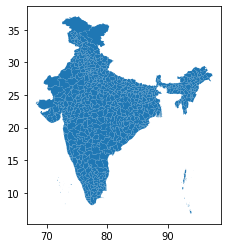

In [26]:
india_s_masters.plot()

In [27]:
##for joining two files
##india_joined = india_s_masters.join(, on='censuscode')
##india_joined.head()

In [28]:
df = pd.DataFrame(np.random.randint(0,100,size=(641, 1)))

In [29]:
india_s_masters['random'] = df

In [30]:
india_s_masters.head()


,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",57
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",55
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",65
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",61
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",62


In [31]:
# We drop the row with the data that is unclear
india_s_masters = india_s_masters[india_s_masters['censuscode'] != 0]

In [32]:
columns_to_plot = ['random']

<AxesSubplot:>

Text(0.5, 1.0, 'random')

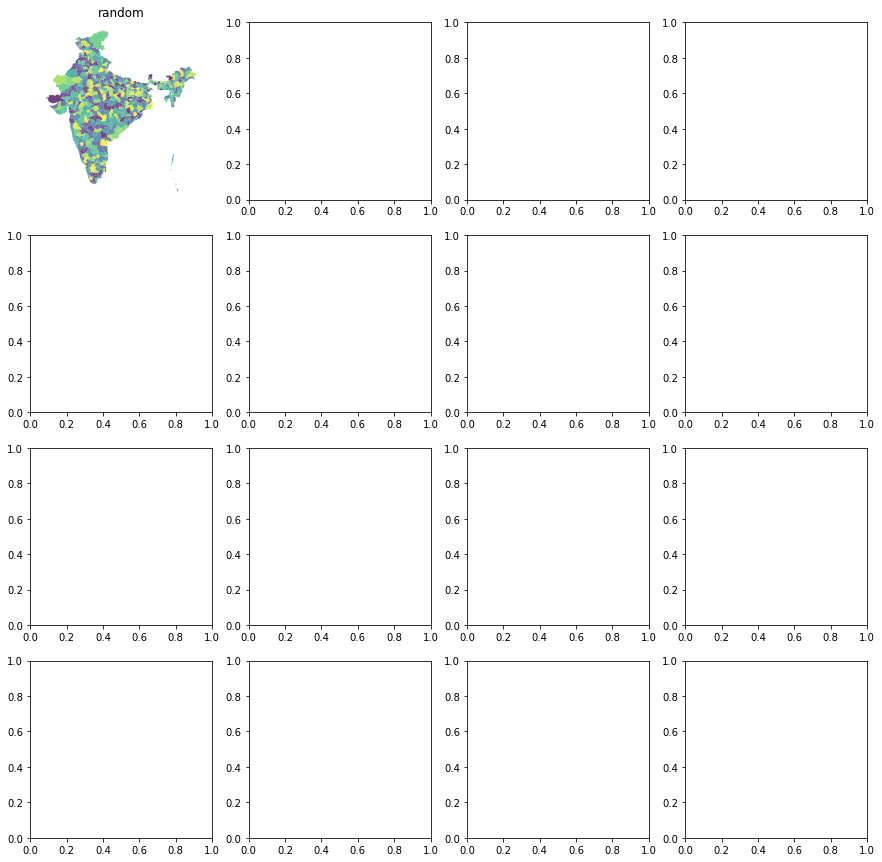

In [33]:
f, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    india_s_masters.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 0.75)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [34]:
india_s_masters.sort_values(by='censuscode', ascending=False)


,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",85
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",47
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2...",21
633,Karaikal,Puducherry,34,4,637,"POLYGON ((79.76528 10.99681, 79.76963 10.99519...",75
353,Mahe,Puducherry,34,3,636,"MULTIPOLYGON (((75.54502 11.73396, 75.55523 11...",0
634,Puducherry,Puducherry,34,2,635,"MULTIPOLYGON (((79.70533 12.01531, 79.70559 12...",47
635,Yanam,Puducherry,34,1,634,"POLYGON ((82.22052 16.73898, 82.22431 16.73626...",76
577,Tiruppur,Tamil Nadu,33,32,633,"POLYGON ((77.22728 11.34388, 77.22010 11.33689...",99
122,Coimbatore,Tamil Nadu,33,31,632,"POLYGON ((77.11075 11.38995, 77.11018 11.38097...",98
323,Krishnagiri,Tamil Nadu,33,30,631,"POLYGON ((78.63535 12.17519, 78.62539 12.17783...",34
